# 思路二：从总体中抽取5000个样本，重复500次，再分别进行回归

## 一、查看数据

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\giao\Desktop\作业\抽样技术\diamonds.csv")

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


## 二、 进行无放回简单随机抽样，抽取500个样本容量为5000的样本

In [8]:
def SRSWOR(dataset,k=500,n=5000):
    tota_number = list(dataset.index)
    ans = []
    for _ in range(k):
        sample = random.sample(tota_number,n)
        ans.append (dataset.iloc[sample])
        
    return ans

In [38]:
samples = SRSWOR(dataset)
print(samples)

[       price  carat        cut color clarity     x     y     z
53888   2749   0.83    Premium     G     SI2  6.06  6.02  3.72
19707    625   0.28       Good     E     VS2  4.23  4.18  2.68
4168    3553   1.04      Ideal     I     SI2  6.51  6.45  4.02
28830    683   0.41  Very Good     H     SI1  4.77  4.83  2.88
229     2783   0.52      Ideal     F      IF  5.14  5.18  3.21
...      ...    ...        ...   ...     ...   ...   ...   ...
14860   5986   1.14    Premium     H     VS2  6.74  6.81  4.08
14255   5775   1.00      Ideal     D     SI1  6.50  6.54  3.95
23921  12048   2.01    Premium     J     SI2  8.19  8.13  4.96
49555   2129   0.81    Premium     J     VS2  6.04  6.00  3.65
44820   1624   0.50  Very Good     G     VS1  5.06  5.22  3.19

[5000 rows x 8 columns],        price  carat        cut color clarity     x     y     z
16779   6683   1.02      Ideal     G     VS1  6.46  6.40  4.00
37133    971   0.33      Ideal     G    VVS1  4.49  4.52  2.75
26695    429   0.31      Ide

## 三、进行回归，输出β

In [51]:
np.random.seed(1)
betas = []
count= 0
for dataset in samples:
    x = dataset.iloc[:,[1]]
    y = dataset.iloc[:,[0]]
    model = linear_model.LinearRegression()
    model.fit(x,y)
    beta = model.coef_[0]
    count+=1
    betas.append(beta)

&emsp;&emsp;最小二乘法求解模型参数公式为：

$$\hat w = (X^TX)^{-1}X^Ty$$

In [52]:
np.random.seed(1)
betas1 = []
count1= 0
for dataset in samples:
    features = dataset.iloc[:,[1]]
    labels = dataset.iloc[:,[0]]
    features1 = np.concatenate((features, np.ones_like(labels)), axis=1)
    w = np.linalg.inv(features1.T.dot(features1)).dot(features1.T).dot(labels)   # 最小二乘法求参数
    beta = w[0]
    count1+=1
    betas1.append(beta)

In [53]:
print(count)

500


In [54]:
print(count1)

500


In [55]:
print(x)

       carat
5528    1.01
36002   0.41
50036   0.71
17844   1.36
38737   0.32
...      ...
12726   1.02
40635   0.41
30049   0.41
44841   0.42
33035   0.32

[5000 rows x 1 columns]


In [56]:
print(features)

       carat
5528    1.01
36002   0.41
50036   0.71
17844   1.36
38737   0.32
...      ...
12726   1.02
40635   0.41
30049   0.41
44841   0.42
33035   0.32

[5000 rows x 1 columns]


In [57]:
print(y)

       price
5528    3853
36002    921
50036   2198
17844   7197
38737   1044
...      ...
12726   5312
40635   1153
30049    719
44841   1625
33035    814

[5000 rows x 1 columns]


In [58]:
print(labels)

       price
5528    3853
36002    921
50036   2198
17844   7197
38737   1044
...      ...
12726   5312
40635   1153
30049    719
44841   1625
33035    814

[5000 rows x 1 columns]


In [59]:
print(betas)

[array([7744.72022144]), array([7694.41271561]), array([7732.16701066]), array([7720.35124562]), array([7805.37830858]), array([7747.24909918]), array([7725.2552685]), array([7846.84574879]), array([7732.61905934]), array([7737.04531516]), array([7811.90678685]), array([7725.2376602]), array([7748.84260828]), array([7721.34641663]), array([7781.77811145]), array([7794.04174148]), array([7791.03914894]), array([7875.6468556]), array([7769.99358296]), array([7702.14120969]), array([7922.75236726]), array([7805.07995387]), array([7624.46666146]), array([7764.94136962]), array([7870.93857166]), array([7673.40201804]), array([7707.41191967]), array([7626.1868861]), array([7696.81360826]), array([7799.02206093]), array([7667.45211438]), array([7761.36583607]), array([7819.01278409]), array([7841.97346929]), array([7920.90484797]), array([7952.4621383]), array([7688.66316571]), array([7668.39049073]), array([7844.0276131]), array([7710.96242486]), array([7690.72381623]), array([7781.68460154]

In [60]:
print(betas1)

[array([7744.72022144]), array([7694.41271561]), array([7732.16701066]), array([7720.35124562]), array([7805.37830858]), array([7747.24909918]), array([7725.2552685]), array([7846.84574879]), array([7732.61905934]), array([7737.04531516]), array([7811.90678685]), array([7725.2376602]), array([7748.84260828]), array([7721.34641663]), array([7781.77811145]), array([7794.04174148]), array([7791.03914894]), array([7875.64685561]), array([7769.99358296]), array([7702.14120969]), array([7922.75236726]), array([7805.07995387]), array([7624.46666146]), array([7764.94136962]), array([7870.93857166]), array([7673.40201804]), array([7707.41191967]), array([7626.1868861]), array([7696.81360826]), array([7799.02206093]), array([7667.45211438]), array([7761.36583607]), array([7819.01278409]), array([7841.97346929]), array([7920.90484797]), array([7952.4621383]), array([7688.66316571]), array([7668.39049073]), array([7844.02761311]), array([7710.96242486]), array([7690.72381623]), array([7781.6846015

## 计算β方差等数据·

In [16]:
mean = np.mean(betas)
print(mean)
var = np.var(betas)
print(var)

7756.156463824563
5903.610455219893


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
betas = np.array(betas)#调用numpy中的array函数创建数组
betas

array([[7734.40415495],
       [7515.29256992],
       [7792.96835531],
       [7771.61682605],
       [7816.297969  ],
       [7659.78827975],
       [7677.42415361],
       [7699.48930482],
       [7776.09466431],
       [7786.889039  ],
       [7790.47469571],
       [7984.02590845],
       [7750.54386746],
       [7774.6423208 ],
       [7702.21830009],
       [7604.52360533],
       [7733.05635541],
       [7769.15855315],
       [7746.76014613],
       [7793.98840147],
       [7686.69203563],
       [7798.31823629],
       [7688.32661978],
       [7787.37272041],
       [7763.64885925],
       [7670.90003625],
       [7707.60677836],
       [7786.06611264],
       [7682.94697012],
       [7773.72035055],
       [7743.30364596],
       [7828.52830449],
       [7713.45500165],
       [7808.17319587],
       [7832.3880246 ],
       [7898.78013136],
       [7696.79490627],
       [7789.42748257],
       [7766.27792303],
       [7873.14602835],
       [7683.3767635 ],
       [7895.681

(array([  2.,   7.,  25.,  67., 127., 128.,  80.,  52.,   8.,   4.]),
 array([7477.38701459, 7530.45431078, 7583.52160698, 7636.58890317,
        7689.65619936, 7742.72349555, 7795.79079174, 7848.85808793,
        7901.92538413, 7954.99268032, 8008.05997651]),
 <BarContainer object of 10 artists>)

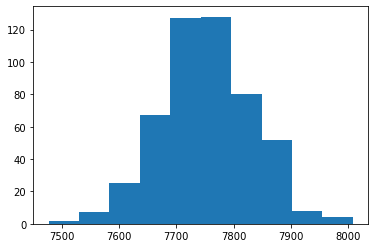

In [195]:
plt.hist(betas)


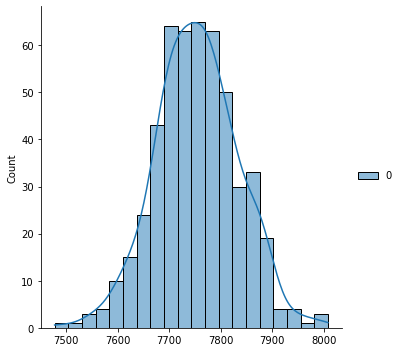

In [196]:
sns.displot(betas,bins=20, kde = True)
